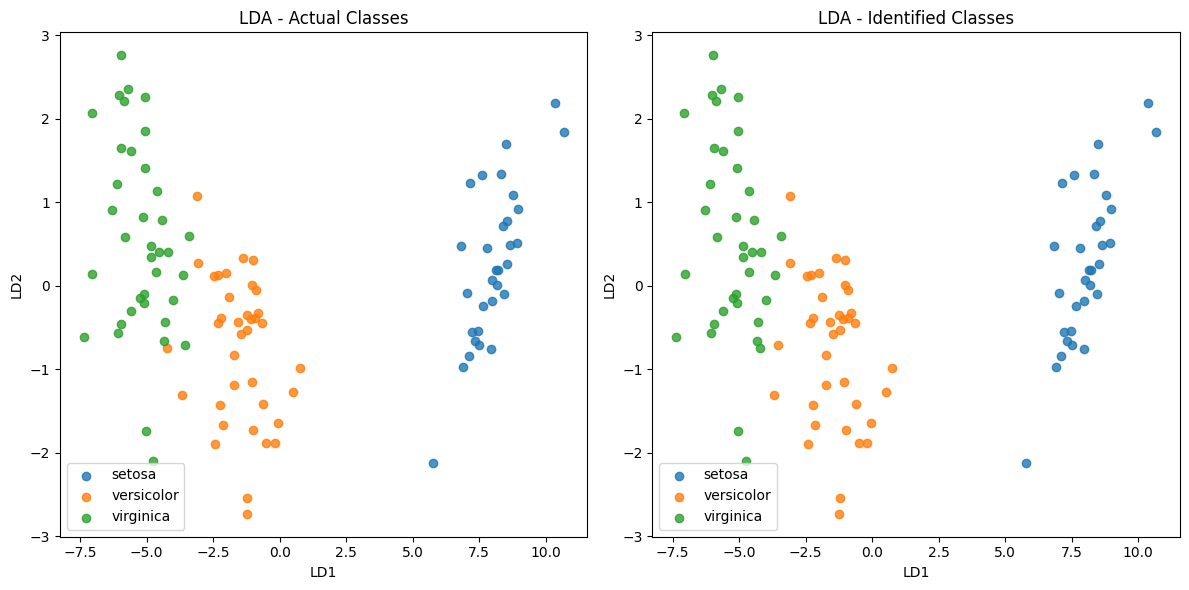

Accuracy: 1.0000


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply LDA
lda = LDA(n_components=2)  # n_components <= number of classes - 1
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Fit a classifier on the LDA-transformed data
classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

# Predict the training set to compare with actual classes
y_train_pred = classifier.predict(X_train_lda)

# Plot the LDA-transformed data with actual classes
plt.figure(figsize=(12, 6))

# Scatter plot of actual classes
plt.subplot(1, 2, 1)
for i, target_name in enumerate(target_names):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], alpha=0.8, label=target_name)
plt.title('LDA - Actual Classes')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best')

# Scatter plot of identified (predicted) classes
plt.subplot(1, 2, 2)
for i, target_name in enumerate(target_names):
    plt.scatter(X_train_lda[y_train_pred == i, 0], X_train_lda[y_train_pred == i, 1], alpha=0.8, label=target_name)
plt.title('LDA - Identified Classes')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, classifier.predict(X_test_lda))
print(f'Accuracy: {accuracy:.4f}')
